In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
df=pd.read_csv("Processed_Flipdata.csv")

In [34]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [35]:
df=df.drop(["Unnamed: 0"],axis=1)

In [36]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [37]:
df.head

<bound method NDFrame.head of                      Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black      64    4      6000        13MP   
1          Infinix SMART 7      Azure Blue      64    4      6000        13MP   
2             MOTOROLA G32    Mineral Gray     128    8      5000        50MP   
3                 POCO C50      Royal Blue      32    2      5000         8MP   
4          Infinix HOT 30i        Marigold     128    8      5000        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900        50MP   
537               LAVA Z21            Cyan      32    2      3100         5MP   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000        50MP   
540               OPPO A77        Sky Blue     128    4      5000        50MP  

In [41]:
df.tail()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"
540,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,"15,999"


In [45]:
df.shape

(541, 11)

In [48]:
df.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 46.6+ KB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Memory,541.0,110.550832,60.600694,16.0,64.00,128.00,128.00,256.00
RAM,541.0,5.397412,1.984923,2.0,4.00,6.00,8.00,8.00
Battery_,541.0,4871.587800,780.148862,800.0,5000.00,5000.00,5000.00,7000.00
AI Lens,541.0,0.062847,0.242911,0.0,0.00,0.00,0.00,1.00
Mobile Height,541.0,16.431201,2.523553,4.5,16.51,16.71,16.94,41.94


In [55]:
df=df.drop_duplicates()
df.count()

Model            531
Colour           531
Memory           531
RAM              531
Battery_         531
Rear Camera      531
Front Camera     531
AI Lens          531
Mobile Height    531
Processor_       531
Prize            531
dtype: int64

In [57]:
df.describe(exclude=['number']).T

,count,unique,top,freq
Model,531,187,REDMI Note 12 Pro 5G,9
Colour,531,275,Yellow,12
Rear Camera,531,14,50MP,255
Front Camera,531,13,16MP,162
Processor_,531,123,Qualcomm Snapdragon 680,33
Prize,531,158,"15,999",23


In [59]:
df.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [61]:
df.nunique()

Model            187
Colour           275
Memory             5
RAM                5
Battery_          37
Rear Camera       14
Front Camera      13
AI Lens            2
Mobile Height     38
Processor_       123
Prize            158
dtype: int64

In [63]:
df.sample()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
355,Tecno Spark Go 2023,Endless Black,32,3,5000,13MP,5MP,0,16.66,"2GHz, Quad Core","6,794"


In [65]:
df.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height
count,531.000000,531.000000,531.000000,531.000000,531.000000
mean,110.915254,5.401130,4873.877589,0.064030,16.450019
std,60.872883,1.991283,765.883129,0.245037,2.494246
min,16.000000,2.000000,800.000000,0.000000,4.500000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000
max,256.000000,8.000000,7000.000000,1.000000,41.940000


In [67]:
print(df.isnull().sum())

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [69]:
df.drop_duplicates(inplace=True)

In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          531 non-null    object 
 1   Colour         531 non-null    object 
 2   Memory         531 non-null    int64  
 3   RAM            531 non-null    int64  
 4   Battery_       531 non-null    int64  
 5   Rear Camera    531 non-null    object 
 6   Front Camera   531 non-null    object 
 7   AI Lens        531 non-null    int64  
 8   Mobile Height  531 non-null    float64
 9   Processor_     531 non-null    object 
 10  Prize          531 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 49.8+ KB
None


In [73]:
df.dtypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

In [75]:
print(df.isna().sum())

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [77]:
missing_rows=df[df['Prize'].isna()]
print(missing_rows)

Empty DataFrame
Columns: [Model, Colour, Memory, RAM, Battery_, Rear Camera, Front Camera, AI Lens, Mobile Height, Processor_, Prize]
Index: []


In [79]:
df['Prize'] = df['Prize'].astype(str).str.replace(',', '').astype(float).astype('Int64')

In [81]:
df['Prize']=df['Prize'].fillna(df['Prize'].median())

In [83]:
df.isna().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [85]:
float_cols=['Memory','RAM','Battery_', 'Mobile Height', 'Prize']
df[float_cols]=df[float_cols].astype(int)

In [87]:
df.dtypes

Model            object
Colour           object
Memory            int32
RAM               int32
Battery_          int32
Rear Camera      object
Front Camera     object
AI Lens           int64
Mobile Height     int32
Processor_       object
Prize             int32
dtype: object

EDA

DATA PREPROCESSING

In [134]:
# Drop unnecessary index column
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [136]:
# Handle missing values separately
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [138]:
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()) if np.issubdtype(x.dtype, np.number) else x)
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [140]:
# Convert categorical variables using one-hot encoding
# Ensure only existing categorical columns are used
categorical_features = [col for col in ['Model', 'Colour', 'Processor_'] if col in df.columns]
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [91]:
numerical_column=df.select_dtypes(include=['int']).columns
numerical_column

Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize'], dtype='object')

<Axes: ylabel='count'>

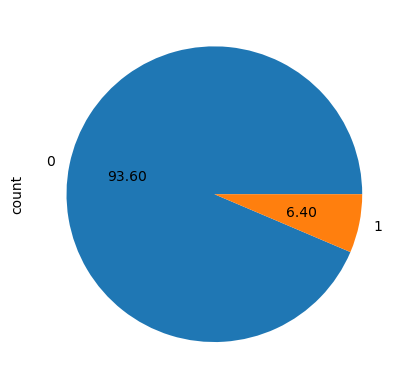

In [93]:
df['AI Lens'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

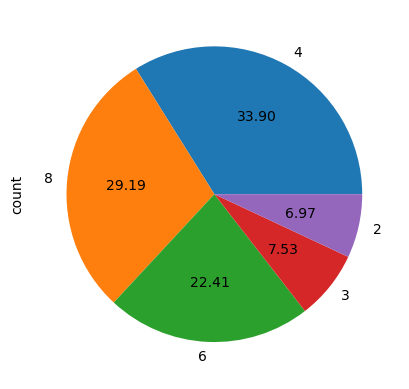

In [94]:
df['RAM'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

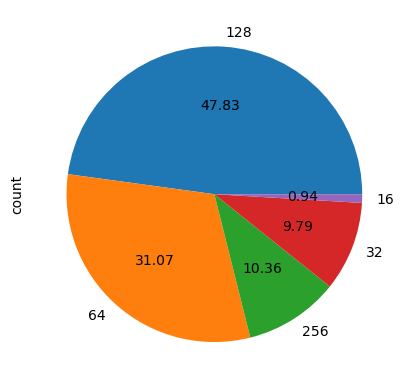

In [95]:
df['Memory'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Battery_'>

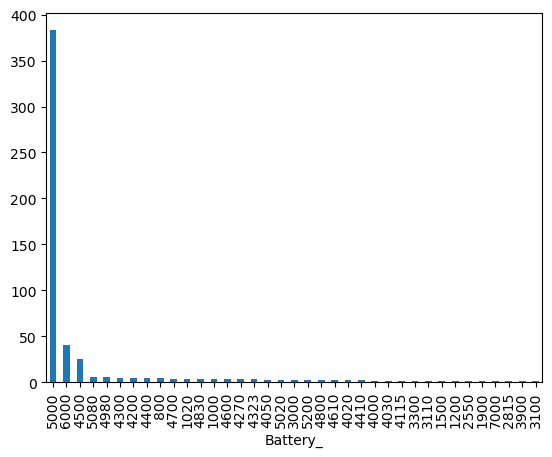

In [98]:
df['Battery_'].value_counts().plot(kind='bar')

In [100]:
print("The numerical columns:", len(numerical_column))

The numerical columns: 6


Numerical columns are divided into

1. Discrete
2. Countinuous

2. Categorical Column

In [103]:
categorical_column=df.select_dtypes(include=['object','float64'])
categorical_column

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


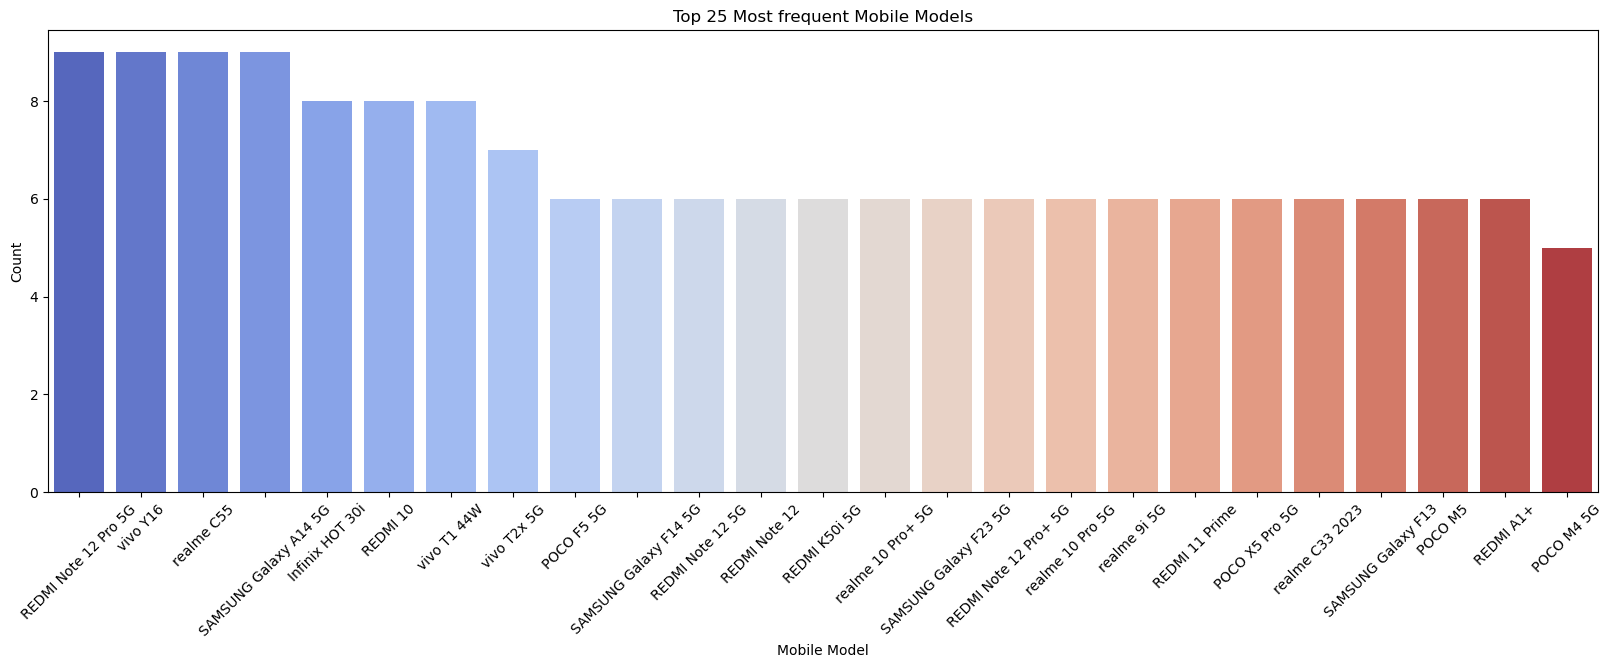

In [107]:
top_models = df["Model"].value_counts().nlargest(25)

plt.figure(figsize=(20, 6))
sns.barplot(x=top_models.index,y=top_models.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Mobile Model")
plt.ylabel("Count")
plt.title("Top 25 Most frequent Mobile Models")
plt.show()

Now showing all the data for the mobile prize 

Feature Extraction (Correlation Analysis)

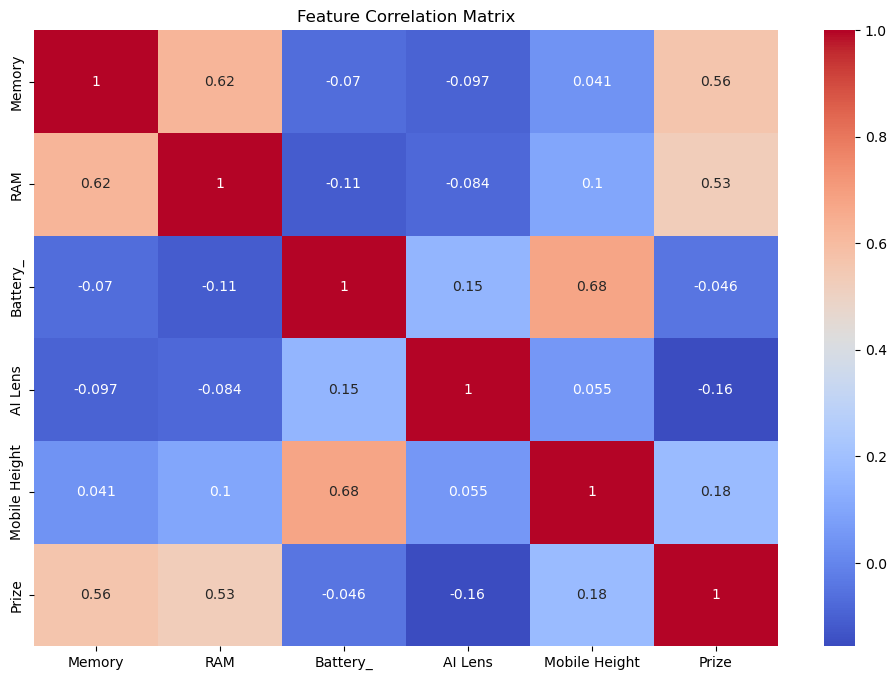

In [115]:
# Compute correlation matrix
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()


# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

Train-Test Split

In [118]:
# Define target variable and features
target = 'Prize'
features = [col for col in df.columns if col != target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

Standardize Features

In [121]:
# Apply standard scaling
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Machine Learning Model

In [124]:
# Train Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Evaluate Model Performance

In [127]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 3574.1117172725358
Root Mean Squared Error: 7141.019772154707


Feature Importance Analysis

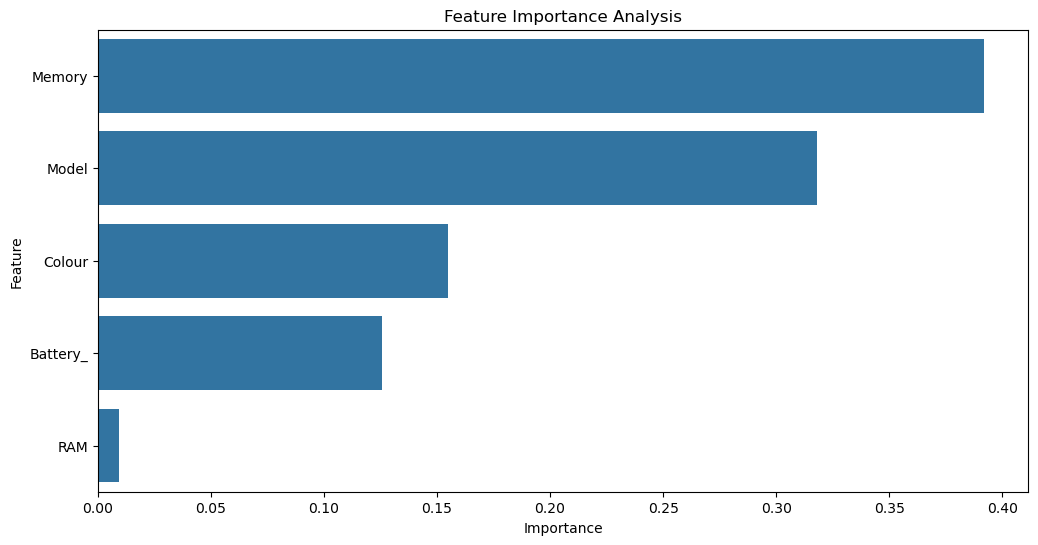

In [132]:
# Get feature importances
feature_importances = model.feature_importances_
feature_names = df.drop(columns=[target]).columns

# Create dataframe of importances
importance_df = pd.DataFrame({'Feature': feature_names[:len(feature_importances)], 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title("Feature Importance Analysis")
plt.show()